<a href="https://colab.research.google.com/github/SaiButhongyou/229352-StatisticalLearning/blob/main/229351_LAB11_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ปฏิบัติการครั้งที่ 9

ดาวน์โหลดข้อมูลอุณหภูมิสูงสุดรายวันปี 1998-2019 จาก link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/CM_temp.csv

1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน
2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 2 ปีสุดท้ายและ Training set เป็นข้อมูลที่เหลือ
3. ลองสร้างโมเดล SARIMA อันดับต่างๆ แล้วระบุโมเดลที่ดีที่สุด
4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

In [49]:
# ONLY RUN THIS WHEN THERE IS AN ERROR
!pip install --user statsmodels==0.13.1

  Using cached statsmodels-0.13.1.tar.gz (18.1 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [50]:
!wget -O CM_temp.csv https://donlapark.pages.dev/229351/data/CM_temp.csv

--2025-09-23 15:40:20--  https://donlapark.pages.dev/229351/data/CM_temp.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139473 (136K) [text/csv]
Saving to: ‘CM_temp.csv’

CM_temp.csv         100%[===================>] 136.20K  --.-KB/s    in 0.009s  

2025-09-23 15:40:21 (14.0 MB/s) - ‘CM_temp.csv’ saved [139473/139473]



In [51]:
!pip3 install pmdarima

In [52]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA


In [53]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
def parser(dates):
  return pd.datetime.strptime(dates, '%Y-%m-%d')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
import pandas as pd
data = pd.read_csv('CM_temp.csv')

data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')


data.head()

,Date,MaxTemp
0,1998-01-01,30.6
1,1998-01-02,32.0
2,1998-01-03,31.6
3,1998-01-04,32.1
4,1998-01-05,31.2


ข้อมูล (สมมติว่าชื่อ `data`) ที่ load มาเป็นข้อมูลรายวัน ทำการหาค่าเฉลี่ยรายเดือนด้วยคำสั่ง

In [54]:
# y = data['MaxTemp'].resample("M").mean()
data.set_index('Date', inplace=True)

In [55]:
y = data.resample('M').mean()

y

/tmp/ipython-input-2016212735.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = data.resample('M').mean()


,MaxTemp
Date,
1998-01-31,31.687097
1998-02-28,33.685714
1998-03-31,37.103226
1998-04-30,37.910000
1998-05-31,35.848387
...,...
2019-03-31,37.051613
2019-04-30,39.716667
2019-05-31,37.680645


In [56]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [57]:
train = y[:-24]
test = y[-24:]

print(test)

              MaxTemp
Date                 
2017-08-31  32.764516
2017-09-30  33.140000
2017-10-31  32.158065
2017-11-30  31.616667
2017-12-31  29.229032
2018-01-31  30.048387
2018-02-28  33.253571
2018-03-31  35.674194
2018-04-30  35.900000
2018-05-31  34.648387
2018-06-30  33.066667
2018-07-31  32.000000
2018-08-31  32.258065
2018-09-30  33.506667
2018-10-31  32.864516
2018-11-30  32.336667
2018-12-31  30.229032
2019-01-31  30.622581
2019-02-28  34.564286
2019-03-31  37.051613
2019-04-30  39.716667
2019-05-31  37.680645
2019-06-30  35.466667
2019-07-31  34.070968


In [58]:
from statsmodels.tsa.stattools import adfuller, kpss

def KPSStest(timeseries):
  kpsstest = kpss(timeseries)
  print('KPSS test')
  print('Test Statistic: ',kpsstest[0])
  print('p-value: ',kpsstest[1])
  print('Number of Observations Used: ',kpsstest[2])
  print('Critical Values: ',kpsstest[3])

def ADFtest(timeseries):
  adftest = adfuller(timeseries)
  print('ADF test')
  print('Test Statistic: ',adftest[0])
  print('p-value: ',adftest[1])
  print('#Lags Used: ',adftest[2])
  print('Number of Observations Used: ',adftest[3])
  print('Critical Values: ',adftest[4])


In [59]:
KPSStest(y)
ADFtest(y)

KPSS test
Test Statistic:  0.6428439386603282
p-value:  0.018741460121788345
Number of Observations Used:  4
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
ADF test
Test Statistic:  -2.222023197657817
p-value:  0.19834961731512274
#Lags Used:  13
Number of Observations Used:  245
Critical Values:  {'1%': np.float64(-3.4573260719088132), '5%': np.float64(-2.873410402808354), '10%': np.float64(-2.573095980841316)}


In [60]:
print(y)
print(y.shift())

              MaxTemp
Date                 
1998-01-31  31.687097
1998-02-28  33.685714
1998-03-31  37.103226
1998-04-30  37.910000
1998-05-31  35.848387
...               ...
2019-03-31  37.051613
2019-04-30  39.716667
2019-05-31  37.680645
2019-06-30  35.466667
2019-07-31  34.070968

[259 rows x 1 columns]
              MaxTemp
Date                 
1998-01-31        NaN
1998-02-28  31.687097
1998-03-31  33.685714
1998-04-30  37.103226
1998-05-31  37.910000
...               ...
2019-03-31  34.564286
2019-04-30  37.051613
2019-05-31  39.716667
2019-06-30  37.680645
2019-07-31  35.466667

[259 rows x 1 columns]


In [61]:
y_diff = y-y.shift()
y_diff.dropna(inplace=True)

KPSStest(y_diff)
ADFtest(y_diff)

KPSS test
Test Statistic:  0.04516874529942415
p-value:  0.1
Number of Observations Used:  28
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
ADF test
Test Statistic:  -6.227064576112576
p-value:  5.0583827570587737e-08
#Lags Used:  12
Number of Observations Used:  245
Critical Values:  {'1%': np.float64(-3.4573260719088132), '5%': np.float64(-2.873410402808354), '10%': np.float64(-2.573095980841316)}


/tmp/ipython-input-1038345927.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries)


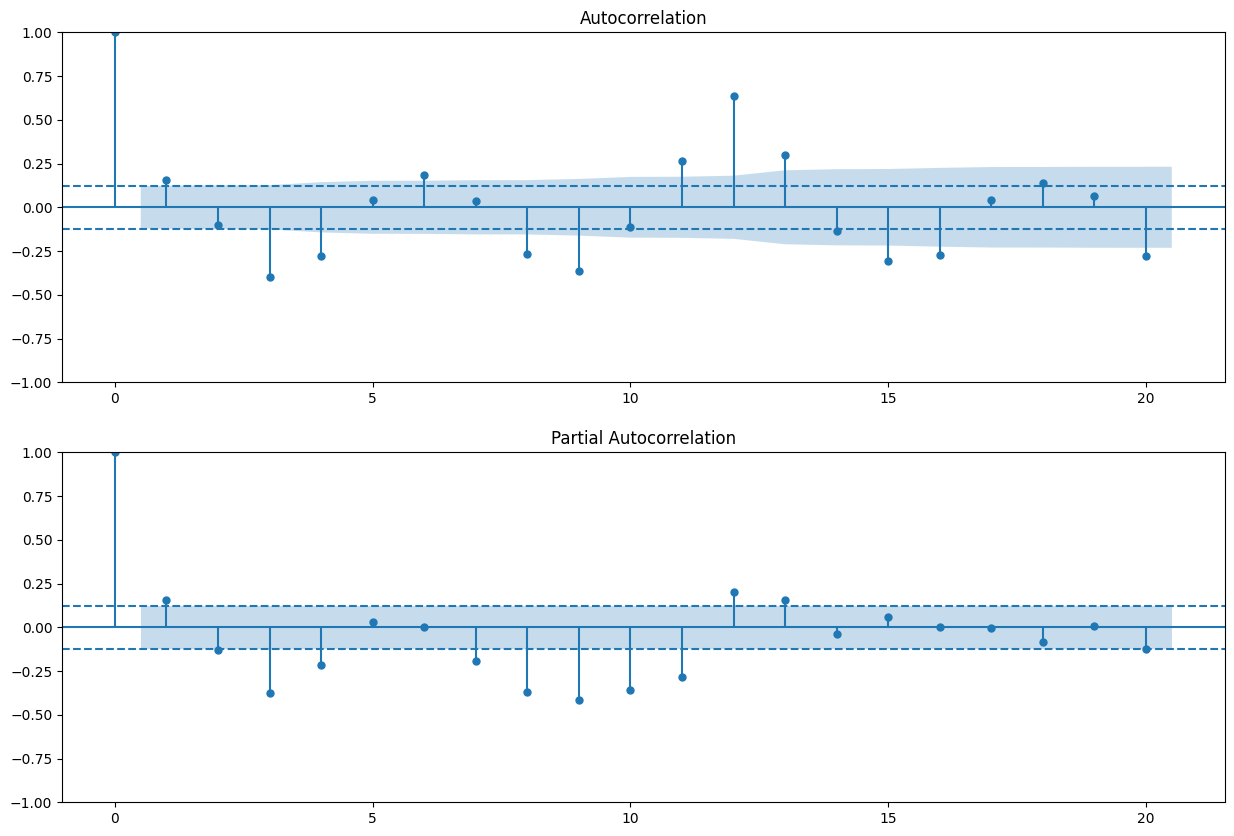

In [62]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2,1,figsize=(15, 10))

plot_acf(y_diff, lags=20, ax=ax[0]);
ax[0].axhline(y=-1.96/(len(y)-1)**.5, linestyle = '--')
ax[0].axhline(y=1.96/(len(y)-1)**.5, linestyle = '--')

plot_pacf(y_diff, lags=20, ax=ax[1]);
ax[1].axhline(y=-1.96/(len(y)-1)**.5, linestyle = '--')
ax[1].axhline(y=1.96/(len(y)-1)**.5, linestyle = '--')

In [63]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(train, order=(0,1,3))

In [64]:
arima_fit = arima.fit()
yhat = arima_fit.predict('2017-08-31', '2019-07-31')

<Figure size 1200x600 with 0 Axes>

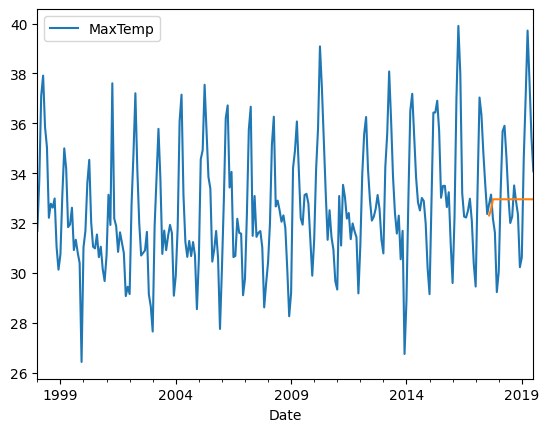

In [65]:
plt.figure(figsize=(12,6))
y.plot()
yhat.plot();

In [66]:
print('RMSE:', rmse(test.values, yhat.values))

RMSE: 2.5463642784387495


/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

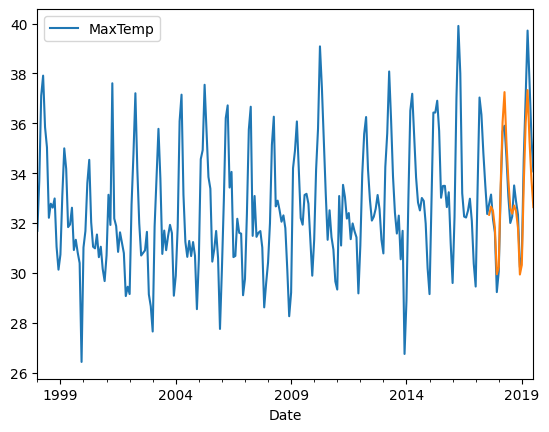

In [67]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train, order=(0, 1, 4), seasonal_order=(1, 1, 1, 12))

sarima_fit = sarima.fit(optimized=True)
yhat = sarima_fit.predict('2017-08-31', '2019-07-31')

plt.figure(figsize=(12,6))
y.plot()
yhat.plot();

In [68]:
print('RMSE:', rmse(test.values, yhat.values))

RMSE: 3.2541462451280054
